In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file
import random as rd
import matplotlib.pyplot as plt
from math import sqrt

In [ ]:
data = pd.read_csv("/content/clustering.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


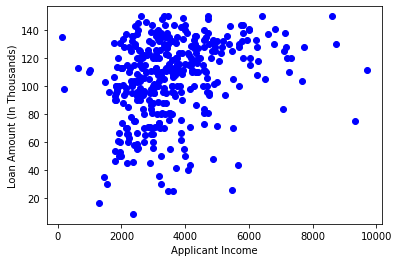

In [ ]:
# Taking two variables from data "ApplicantIncome" and "LoanAmount".

X = data[["ApplicantIncome", "LoanAmount"]]
# Visualize data point
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="blue")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount (In Thousands)")
plt.show()

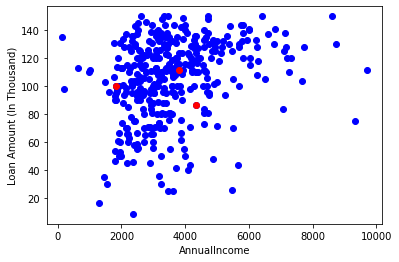

In [ ]:
# Choosing the number of clusters K & selecting K random points from the data as centroid

# number of centriod
K=3

# select random observation as a centriod 
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="blue")
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c="red")
plt.xlabel("AnnualIncome")
plt.ylabel("Loan Amount (In Thousand)")
plt.show()

In [ ]:
Centroids

,ApplicantIncome,LoanAmount
24,1828,100.0
105,4344,87.0
146,3812,112.0


In [ ]:
# Assigning all the points to the closest cluster centroid & Recompute centroids of newly formed clusters
# Repeating these 2 two processes

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2 = (row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
    
    C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount", "ApplicantIncome"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


390.88276508180206
165.7267199174109
241.75650104316816
284.41335268050597
211.50041280045707
223.00303487546444
187.01068731505586
98.01161657776196
52.84741626127729
98.54724443834282
90.64953219227577
18.274686272279013
9.21023994083339
18.345487493007468
46.27013250786139
0.0


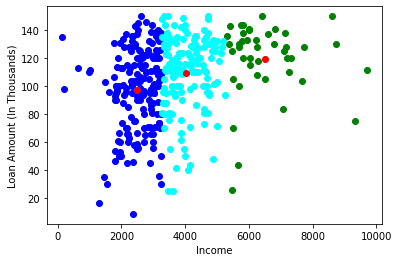

In [ ]:
# Visualizing

color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()